In [156]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split, cross_val_score

Данные https://www.kaggle.com/datasets/brsdincer/pulsar-classification-for-class-prediction?select=Pulsar.csv

На основе интегрированного профиля наблюдения

Столбцы:

Среднее_Интегрированное: Среднее наблюдение

SD: Стандартное отклонение наблюдений

EK: Избыточный куртоз наблюдений

Наклонность: В теории вероятностей и статистике перекос - это мера асимметрии распределения вероятностей реальной случайной величины относительно ее среднего значения. Наклонность наблюдений.

Среднее _ DMSNR _ Кривая: Среднее значение DM SNR CURVE наблюдений

SD _ DMSNR _ Кривая: Стандартное отклонение DM SNR CURVE наблюдений

EK _ DMSNR _ Кривая: Избыток куртоза DM SNR CURVE наблюдений

Наклон _ DMSNR _ Кривая: Наклонность DM SNR CURVE наблюдений

Класс: Класс 0 - 1

ЧТО ТАКОЕ КРИВАЯ DM SNR:

Радиоволны, испускаемые пульсарами, достигают Земли после путешествия на большие расстояния в пространстве, которое заполнено свободными электронами. Важным моментом является то, что пульсары излучают широкий диапазон частот, а количество, на которое электроны замедляют волну, зависит от частоты. Волны с более высокой частотой посеиваются меньше по сравнению с волнами с более высокой частотой. Это означает дисперсию.

Загрузим данные

In [157]:
data = pd.read_csv('Pulsar.csv')
print(data[0:10])
print()

   Mean_Integrated         SD        EK  Skewness  Mean_DMSNR_Curve  \
0       140.562500  55.683782 -0.234571 -0.699648          3.199833   
1       102.507812  58.882430  0.465318 -0.515088          1.677258   
2       103.015625  39.341649  0.323328  1.051164          3.121237   
3       136.750000  57.178449 -0.068415 -0.636238          3.642977   
4        88.726562  40.672225  0.600866  1.123492          1.178930   
5        93.570312  46.698114  0.531905  0.416721          1.636288   
6       119.484375  48.765059  0.031460 -0.112168          0.999164   
7       130.382812  39.844056 -0.158323  0.389540          1.220736   
8       107.250000  52.627078  0.452688  0.170347          2.331940   
9       107.257812  39.496488  0.465882  1.162877          4.079431   

   SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0       19.110426        7.975532             74.242225      0  
1       14.860146       10.576487            127.393580      0  
2       21.744669      

Информация о датафрейме

In [158]:
data.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [161]:
print("В таблице {0} строк и {1} столбцов.".format(len(data), len(data.columns)))

В таблице 17898 строк и 9 столбцов.


In [162]:
memory = data.memory_usage().sum()
print("DataFrame занимает объем памяти {0} КБ.".format(round(memory/1000,1)))

DataFrame занимает объем памяти 1288.8 КБ.


In [163]:
counts_dtype = data.dtypes.value_counts()
print("В таблице {0} столбца с разными типами: \n{1}.".format(len(counts_dtype), counts_dtype))

В таблице 2 столбца с разными типами: 
float64    8
int64      1
Name: count, dtype: int64.


Пропуски в данных

In [164]:
data.isnull().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

Распределение средних наблюдений

<Axes: >

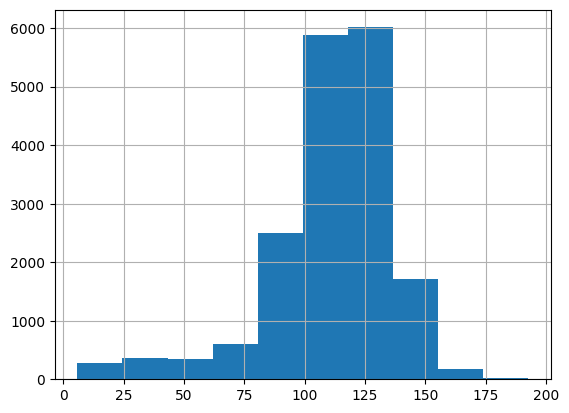

In [165]:
data.Mean_Integrated.hist()

Определим функцию для визуализации выбросов

In [166]:
def show_boxplot(data, columns):
    plt.figure(figsize=(12,10))

    for i,col in enumerate(columns):
        plt.subplot(5,2,i + 1) # в списке интервальных переменных 10 элементов, поэтому сетку успользуем 3 на 4 (т.е. для 12 элементов чтобы все поместились)
        sns.boxplot(y=col, data=data)
        #plt.ylabel('')

    plt.tight_layout()
    plt.show()

Графики выбросов

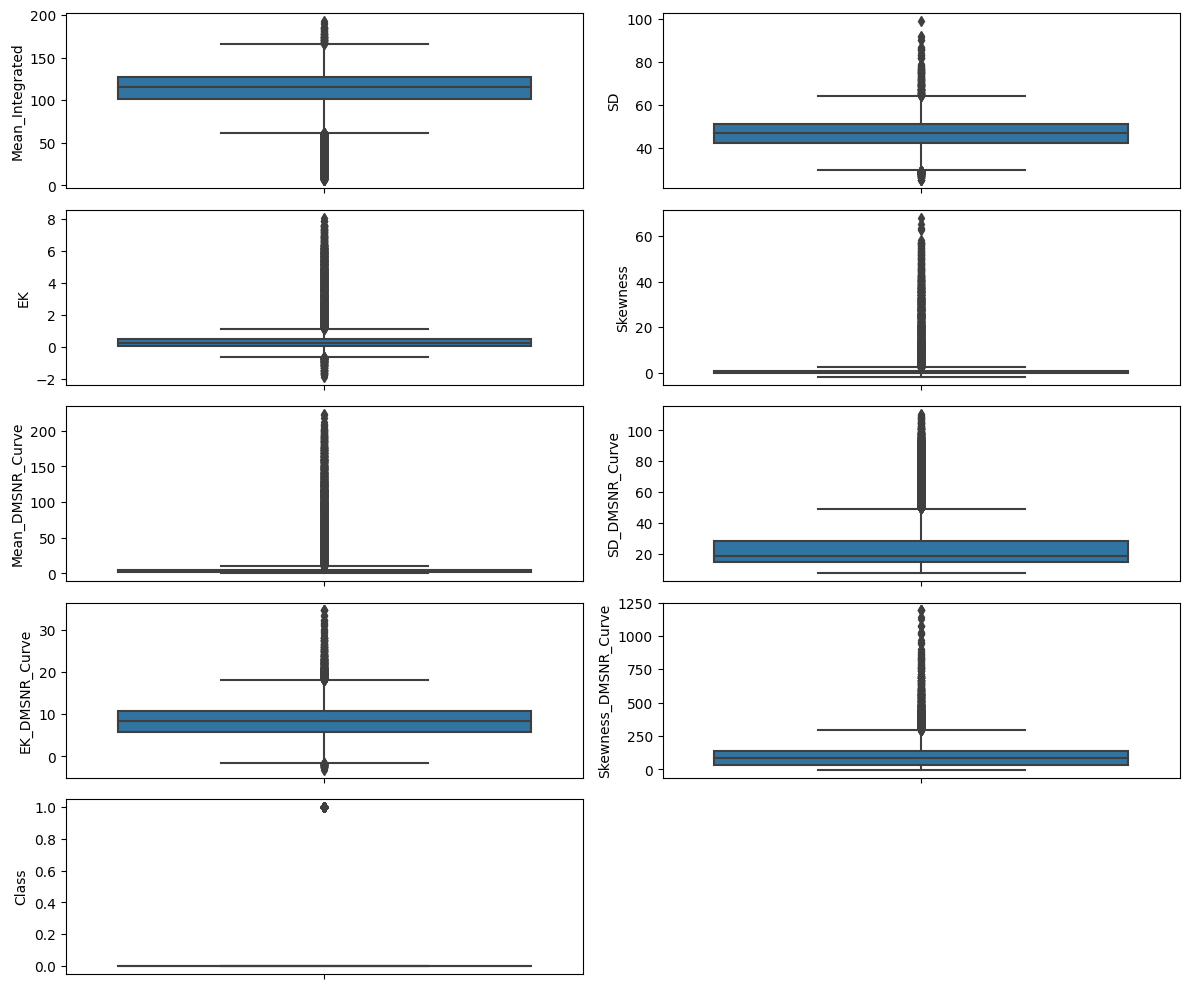

In [167]:
show_boxplot(data, data.columns)

In [168]:
X = data.drop('Class', axis = 1)
y = data.Class

In [169]:
data.drop('Class', axis = 1).columns

Index(['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve'],
      dtype='object')

Удалиение выбросов интерквартильным методом

In [170]:
def remove_value(data):
    for col in data.drop('Class', axis = 1).columns:
        print(col)
        quantile_25 = data[col].quantile(0.25)
        quantile_75 = data[col].quantile(0.75)
        iqr = quantile_75 - quantile_25
        min_value = quantile_25 - (1.5 * iqr)
        max_value = quantile_75 + (1.5 * iqr)
        print(min_value, max_value)
        index_to_drop = data[(data[col] < min_value) | (data[col] > max_value)].index
        print()
        print(len(index_to_drop))
        data = data.drop(index_to_drop)
    show_boxplot(data, data.columns)
    return data

Mean_Integrated
61.6953125 166.3203125

1030
SD
31.013328515 63.325041635000005

149
EK
-0.58610856375 1.02531312225

686
Skewness
-1.5001386155 1.9184447405

971
Mean_DMSNR_Curve
-1.6694188975 7.7678720745

1916
SD_DMSNR_Curve
2.9078788049999975 31.891996585

287
EK_DMSNR_Curve
2.1829520574999988 16.8770809495

578
Skewness_DMSNR_Curve
-57.67633484999999 270.35028299

424


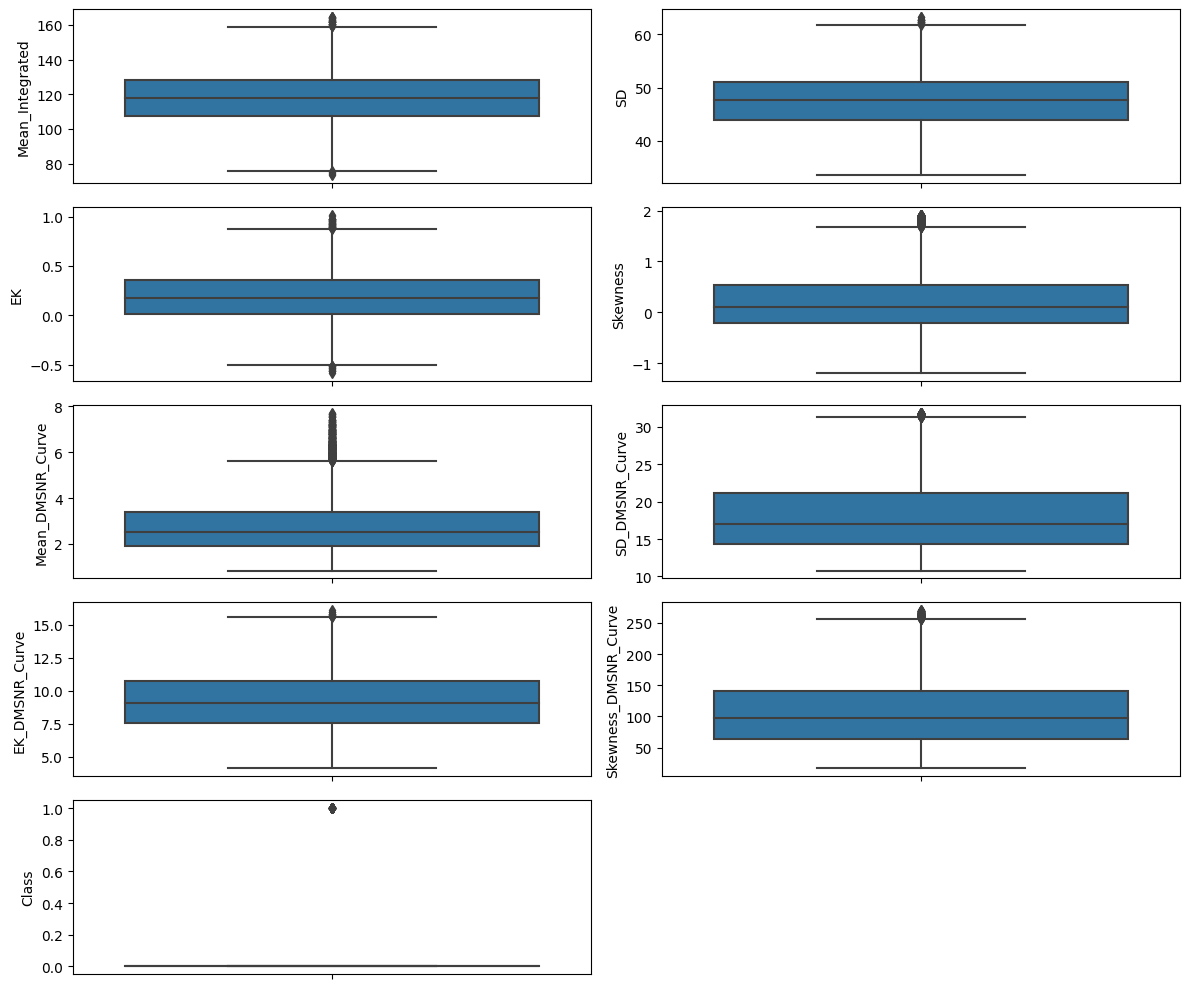

In [171]:
data = remove_value(data)

In [172]:
my_random_state = 42

In [173]:
len(data)

11857

__Обучение моделей__

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=my_random_state)

__XGB__

In [175]:
xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.001)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [176]:
accuracy_score(y_test, np.round(xgb_model.predict(X_test))), accuracy_score(y_train, np.round(xgb_model.predict(X_train)))


(0.979050279329609, 0.9794664059226149)

__GradientBoosting__

In [177]:
gbr_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=my_random_state)
gbr_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [178]:
gbr_model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 1])

Оценка качества модели

In [179]:
accuracy_score(y_test, np.round(gbr_model.predict(X_test))), accuracy_score(y_train, np.round(gbr_model.predict(X_train)))

(0.9776536312849162, 0.9855426735577595)

__DecisionTreeClassifier__

In [180]:
tree_params = {'criterion':['entropy', ],
               'max_depth':[5,7,10,15],
               'ccp_alpha':[0.01, 0.05, 0.1, 0.5, 1]}

In [181]:
best_accuracy = 0
for criterion in tree_params['criterion']:
    for max_depth in tree_params['max_depth']:
        for ccp_alpha in tree_params['ccp_alpha']:
            dtree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, 
                                           ccp_alpha=ccp_alpha,
                                           random_state=my_random_state)
            scores = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
            avg_accuracy = np.mean(scores)
            if avg_accuracy>best_accuracy:
                best_accuracy = avg_accuracy
                best_params = {'criterion':criterion,'max_depth':max_depth,
                               'ccp_alpha':ccp_alpha}

In [182]:
best_params

{'criterion': 'entropy', 'max_depth': 5, 'ccp_alpha': 0.01}

In [183]:
best_tree = DecisionTreeClassifier(**best_params)

In [184]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5)

In [185]:
best_tree.score(X_train, y_train), best_tree.score(X_test, y_test)

(0.9776505098477442, 0.9776536312849162)

__Random Forest__

In [186]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=my_random_state,
                            max_samples=0.3)


In [187]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.3, random_state=42)

In [188]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9844950412068725, 0.9807262569832402)

In [189]:
models = [xgb_model, gbr_model, best_tree, rf]

def print_score(model):
    y_pred = model.predict(X_test)
    print(f'Model {model.__class__.__name__} \n accuracy {accuracy_score(y_test, y_pred):0.4f}; \n f1 = {f1_score(y_test, y_pred):0.4f}; \n percison {precision_score(y_test, y_pred):0.4f}; \n recall {recall_score(y_test, y_pred):0.4f}')
    print(f'confusion matrix \n {confusion_matrix(y_test, y_pred)}')
    print()
    print('---------------')

In [190]:
models = [xgb_model, gbr_model, best_tree, rf]

for mod in models:
    print_score(mod)

Model XGBClassifier 
 accuracy 0.9791; 
 f1 = 0.8815; 
 percison 0.8942; 
 recall 0.8692
confusion matrix 
 [[3226   33]
 [  42  279]]

---------------
Model GradientBoostingClassifier 
 accuracy 0.9777; 
 f1 = 0.8714; 
 percison 0.9003; 
 recall 0.8442
confusion matrix 
 [[3229   30]
 [  50  271]]

---------------
Model DecisionTreeClassifier 
 accuracy 0.9777; 
 f1 = 0.8680; 
 percison 0.9228; 
 recall 0.8193
confusion matrix 
 [[3237   22]
 [  58  263]]

---------------
Model RandomForestClassifier 
 accuracy 0.9807; 
 f1 = 0.8863; 
 percison 0.9406; 
 recall 0.8380
confusion matrix 
 [[3242   17]
 [  52  269]]

---------------


Model RandomForestClassifier обладает лучшей предсказательной способностью и высокими метриками качества 
Точность измерений 98%
F Мера 88%
Точность результата измерений 94%